# Online Video Dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import random
import copy
import warnings
warnings.filterwarnings("ignore")
random.seed(42)
np.random.seed(42)

## Section 3.1.1

### Question 1

In [2]:
video_df = pd.read_csv('/Users/bournsh/Desktop/UCLA_Studying/2020winter/ECE219/project4/online_video_dataset/transcoding_mesurment.tsv', sep = '\t')

In [3]:
video_df.head()

id   duration  codec  width  height  bitrate  framerate   i     p  \
0  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
1  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
2  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
3  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
4  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   

   b  ...  p_size  b_size    size  o_codec  o_bitrate o_framerate  o_width  \
0  0  ...  825054       0  889537    mpeg4      56000        12.0      176   
1  0  ...  825054       0  889537    mpeg4      56000        12.0      320   
2  0  ...  825054       0  889537    mpeg4      56000        12.0      480   
3  0  ...  825054       0  889537    mpeg4      56000        12.0      640   
4  0  ...  825054       0  889537    mpeg4      56000        12.0     1280   

   o_height   umem  utime  
0       144  22508  0.612  
1       240  25164  0.980  
2       360  29228  1.216  
3       480  34316  1.692  
4       720  58528  3.456  

[5 rows x 22 columns]

In [4]:
corr = video_df.corr()
corr

duration     width    height   bitrate  framerate         i  \
duration     1.000000  0.072634  0.050446  0.004759  -0.030559  0.773659   
width        0.072634  1.000000  0.990467  0.815328   0.396052  0.077829   
height       0.050446  0.990467  1.000000  0.799082   0.456310  0.093377   
bitrate      0.004759  0.815328  0.799082  1.000000   0.255464  0.059262   
framerate   -0.030559  0.396052  0.456310  0.255464   1.000000  0.263127   
i            0.773659  0.077829  0.093377  0.059262   0.263127  1.000000   
p            0.850175  0.238482  0.234470  0.112427   0.332138  0.831221   
b            0.061523 -0.063823 -0.069076 -0.045938   0.026759  0.122470   
frames       0.851053  0.235592  0.231766  0.111137   0.331983  0.836373   
i_size       0.426600  0.601446  0.592107  0.446320   0.306534  0.537019   
p_size       0.406651  0.560013  0.534646  0.616313   0.196526  0.393288   
b_size            NaN       NaN       NaN       NaN        NaN       NaN   
size         0.416951  0.575222  0.550593  0.615846   0.209523  0.413247   
o_bitrate    0.000149 -0.001025 -0.001004 -0.001328  -0.001684 -0.000739   
o_framerate  0.000698 -0.000245 -0.000204 -0.000284   0.000189  0.000139   
o_width      0.000377 -0.000088 -0.000028 -0.000096   0.000102  0.001220   
o_height     0.000577 -0.000061 -0.000012 -0.000088   0.000100  0.001239   
umem         0.009282  0.035109  0.041452  0.043142   0.059686  0.034206   
utime        0.005533  0.129861  0.128479  0.155200   0.079336  0.018489   

                    p         b    frames    i_size    p_size  b_size  \
duration     0.850175  0.061523  0.851053  0.426600  0.406651     NaN   
width        0.238482 -0.063823  0.235592  0.601446  0.560013     NaN   
height       0.234470 -0.069076  0.231766  0.592107  0.534646     NaN   
bitrate      0.112427 -0.045938  0.111137  0.446320  0.616313     NaN   
framerate    0.332138  0.026759  0.331983  0.306534  0.196526     NaN   
i            0.831221  0.122470  0.836373  0.537019  0.393288     NaN   
p            1.000000  0.065422  0.999844  0.665995  0.605745     NaN   
b            0.065422  1.000000  0.081321 -0.030969 -0.026488     NaN   
frames       0.999844  0.081321  1.000000  0.664543  0.603138     NaN   
i_size       0.665995 -0.030969  0.664543  1.000000  0.713713     NaN   
p_size       0.605745 -0.026488  0.603138  0.713713  1.000000     NaN   
b_size            NaN       NaN       NaN       NaN       NaN     NaN   
size         0.623506 -0.026406  0.620952  0.751780  0.998433     NaN   
o_bitrate   -0.001788  0.002408 -0.001740 -0.002398 -0.003661     NaN   
o_framerate  0.000240  0.000263  0.000243 -0.000285 -0.000096     NaN   
o_width      0.000393  0.000804  0.000417  0.000226  0.000218     NaN   
o_height     0.000482  0.000835  0.000505  0.000182  0.000208     NaN   
umem         0.031283  0.006029  0.031451  0.035931  0.030461     NaN   
utime        0.033201  0.005140  0.033115  0.064711  0.097644     NaN   

                 size  o_bitrate  o_framerate   o_width  o_height      umem  \
duration     0.416951   0.000149     0.000698  0.000377  0.000577  0.009282   
width        0.575222  -0.001025    -0.000245 -0.000088 -0.000061  0.035109   
height       0.550593  -0.001004    -0.000204 -0.000028 -0.000012  0.041452   
bitrate      0.615846  -0.001328    -0.000284 -0.000096 -0.000088  0.043142   
framerate    0.209523  -0.001684     0.000189  0.000102  0.000100  0.059686   
i            0.413247  -0.000739     0.000139  0.001220  0.001239  0.034206   
p            0.623506  -0.001788     0.000240  0.000393  0.000482  0.031283   
b           -0.026406   0.002408     0.000263  0.000804  0.000835  0.006029   
frames       0.620952  -0.001740     0.000243  0.000417  0.000505  0.031451   
i_size       0.751780  -0.002398    -0.000285  0.000226  0.000182  0.035931   
p_size       0.998433  -0.003661    -0.000096  0.000218  0.000208  0.030461   
b_size            NaN        NaN          NaN       NaN       NaN       NaN   
size

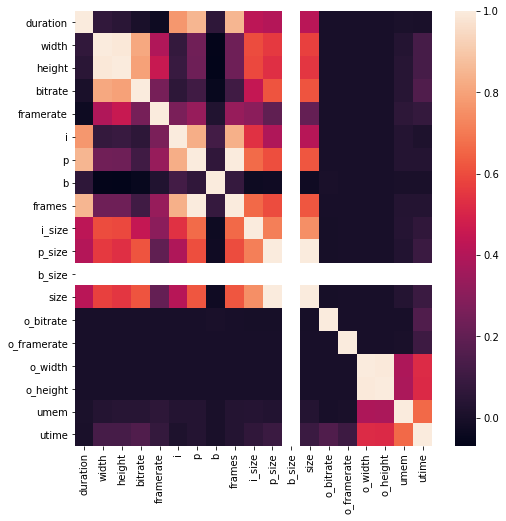

In [5]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

### Question 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2289ead0>,
      dtype=object)

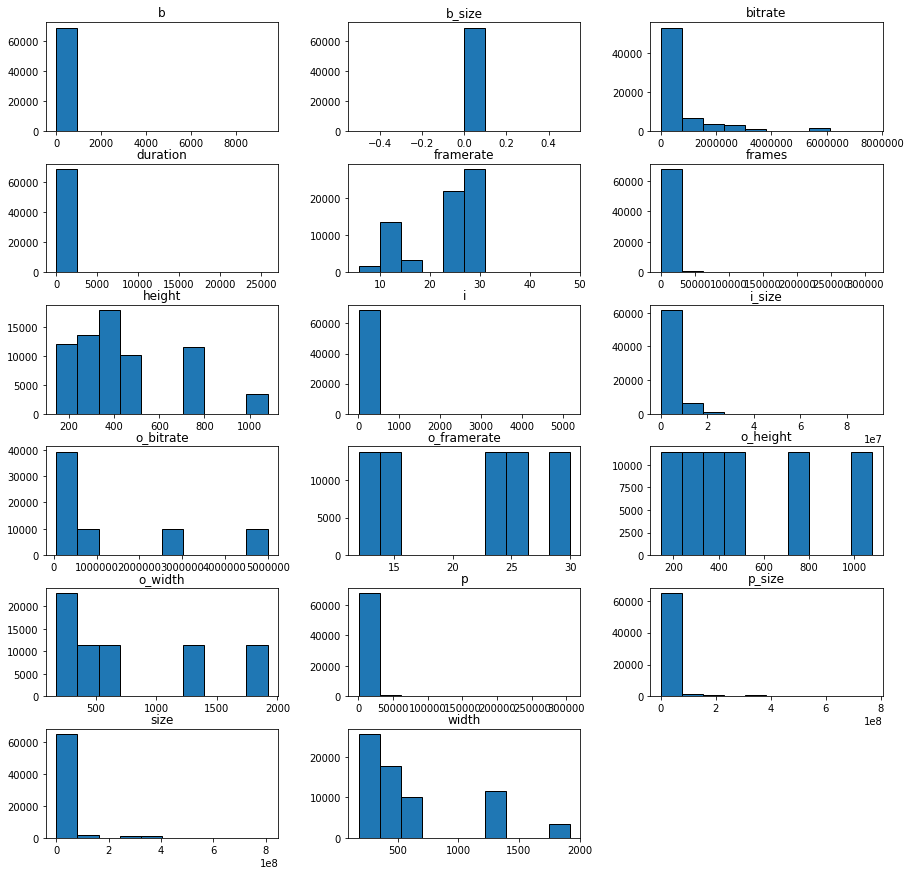

In [6]:
video_df.hist(figsize = (15, 15), layout = (6, 3), ec = 'black', grid = False, column = ['duration', 'height',
    'width', 'bitrate', 'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size', 'size', 'o_bitrate', 
    'o_framerate', 'o_width', 'o_height'])

### Question 3

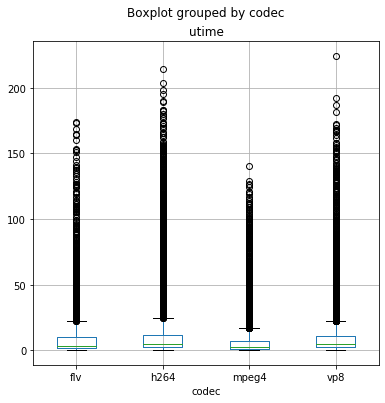

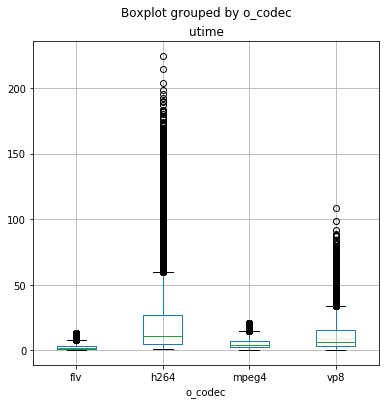

In [7]:
for col in ['codec', 'o_codec']:
        video_df.boxplot(by = col, column = 'utime', figsize = (6, 6))

### Question 5

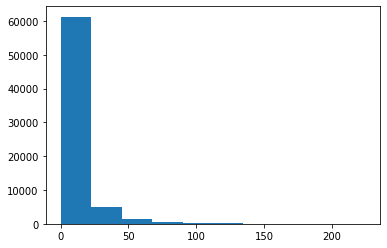

Mean:  9.996354820888516
Median:  4.408


In [8]:
plt.hist(video_df['utime'])
plt.show()
print('Mean: ', np.mean(video_df['utime']))
print('Median: ', np.median(video_df['utime']))

## Section 3.1.2

### Question 6, 7, 8

In [9]:
df_pre = copy.deepcopy(video_df)
video_num_col = ['duration', 'height',
    'width', 'bitrate', 'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size', 'size', 'o_bitrate', 
    'o_framerate', 'o_width', 'o_height']
video_cat_col = ['codec', 'o_codec']

def Standarize(df):
    num_col = video_num_col
    for col in num_col:
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])
    return df


def Onehot(df):
    cat_col = video_cat_col
    for col in cat_col:
        if col in df.columns:
            df = pd.concat([df, pd.get_dummies(df[col], prefix = col)], axis = 1).drop([col], axis = 1)
    return df

def drop(df):
    del_col = ['id', 'umem']
    df = df.drop(columns = del_col)
    return df

def Test(df):
    cat_col = video_cat_col
    for col in cat_col:
        df[col] = df[col].astype('category').cat.codes
    cat_inds = [df.columns.get_loc(col) for col in cat_col]

    target_col = 'utime'
    target = df[target_col]

    df = df.drop(columns = target_col)
    data = df.values

    inds = np.random.choice(len(data), 5000)
    data = data[inds]
    target = target[inds]

    MI_score = mutual_info_regression(data, target, discrete_features = cat_inds)
    MI_score /= np.max(MI_score)

    for i, col in enumerate(df.columns):
        print('{} - MI score: {}'.format(col, MI_score[i])) 
    print('\n')
    F_score = f_regression(data, target)[0]
    
    for i, col in enumerate(df.columns):
        print('{} - F score: {}'.format(col, F_score[i]))
    
    print('\n')
    print(data.shape)
    
def result(model, data, target):
    rmse_function = make_scorer(mean_squared_error, squared = False)
    res = cross_validate(model, data, target, cv=10, scoring=rmse_function, return_train_score=True)
    train_rmse = np.mean(res['train_score'])
    test_rmse = np.mean(res['test_score'])
    return train_rmse, test_rmse

In [10]:
df_std = drop(df_pre)
df_std = Standarize(df_std)


In [11]:
df_pre

id   duration  codec  width  height  bitrate  framerate    i  \
0      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
1      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
2      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
3      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
4      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
...            ...        ...    ...    ...     ...      ...        ...  ...   
68779  ZWEN-71BqPs  972.27100   h264    480     360   278822  29.000000  560   
68780  zWQN-bqqg0o  129.88100    vp8    640     480   639331  30.162790   36   
68781  zX17-vi0sqQ  249.68000    vp8    320     240   359345  25.068274  129   
68782  zyiT-TzxIpk  183.62334   h264   1280     720  2847539  29.000000   98   
68783  zZKo-QsY86U  294.61334  mpeg4    176     144    55242  12.000000   61   

           p  b  ...    p_size  b_size      size  o_codec  o_bitrate  \
0       1537  0  ...    825054       0    889537    mpeg4      56000   
1       1537  0  ...    825054       0    889537    mpeg4      56000   
2       1537  0  ...    825054       0    889537    mpeg4      56000   
3       1537  0  ...    825054       0    889537    mpeg4      56000   
4       1537  0  ...    825054       0    889537    mpeg4      56000   
...      ... ..  ...       ...     ...       ...      ...        ...   
68779  28580  0  ...  26561730       0  33886358      flv     242000   
68780   3855  0  ...   9503846       0  10379630    mpeg4     539000   
68781   6113  0  ...   9456514       0  11215178      flv     539000   
68782   5405  0  ...  60113035       0  65359329    mpeg4     539000   
68783   3474  0  ...   1950409       0   2034411     h264     820000   

      o_framerate  o_width  o_height    umem   utime  
0           12.00      176       144   22508   0.612  
1           12.00      320       240   25164   0.980  
2           12.00      480       360   29228   1.216  
3           12.00      640       480   34316   1.692  
4           12.00     1280       720   58528   3.456  
...           ...      ...       ...     ...     ...  
68779       24.00      640       480   88692   1.552  
68780       29.97     1920      1080  107524  18.557  
68781       12.00      176       144   88708   0.752  
68782       12.00      320       240   88724   5.444  
68783       24.00      176       144   88736   3.076  

[68784 rows x 22 columns]

In [12]:
df_std

duration  codec     width    height   bitrate  framerate         i  \
0     -0.543270  mpeg4 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457   
1     -0.543270  mpeg4 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457   
2     -0.543270  mpeg4 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457   
3     -0.543270  mpeg4 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457   
4     -0.543270  mpeg4 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457   
...         ...    ...       ...       ...       ...        ...       ...   
68779  2.387620   h264 -0.312921 -0.218492 -0.378671   0.797072  5.416577   
68780 -0.544926    vp8  0.032528  0.280232 -0.049625   0.958016 -0.765280   
68781 -0.127879    vp8 -0.658369 -0.717217 -0.305176   0.252873  0.331882   
68782 -0.357837   h264  1.414323  1.277682  1.965863   0.797072 -0.033839   
68783  0.028544  mpeg4 -0.969273 -1.116197 -0.582738  -1.555936 -0.470344   

              p         b    frames    i_size    p_size  b_size      size  \
0     -0.822060 -0.098879 -0.825201 -0.641488 -0.418960     0.0 -0.445729   
1     -0.822060 -0.098879 -0.825201 -0.641488 -0.418960     0.0 -0.445729   
2     -0.822060 -0.098879 -0.825201 -0.641488 -0.418960     0.0 -0.445729   
3     -0.822060 -0.098879 -0.825201 -0.641488 -0.418960     0.0 -0.445729   
4     -0.822060 -0.098879 -0.825201 -0.641488 -0.418960     0.0 -0.445729   
...         ...       ...       ...       ...       ...     ...       ...   
68779  3.628857 -0.098879  3.656298  1.037117  0.085951     0.0  0.163702   
68780 -0.440548 -0.098879 -0.447030 -0.453909 -0.248696     0.0 -0.270453   
68781 -0.068911 -0.098879 -0.064958 -0.249780 -0.249625     0.0 -0.255021   
68782 -0.185438 -0.098879 -0.185057  0.556589  0.744172     0.0  0.744989   
68783 -0.503255 -0.098879 -0.504885 -0.636975 -0.396882     0.0 -0.424584   

      o_codec  o_bitrate  o_framerate   o_width  o_height   utime  
0       mpeg4  -0.765453    -1.378218 -1.026856 -1.138803   0.612  
1       mpeg4  -0.765453    -1.378218 -0.790773 -0.834975   0.980  
2       mpeg4  -0.765453    -1.378218 -0.528459 -0.455190   1.216  
3       mpeg4  -0.765453    -1.378218 -0.266145 -0.075405   1.692  
4       mpeg4  -0.765453    -1.378218  0.783112  0.684165   3.456  
...       ...        ...          ...       ...       ...     ...  
68779     flv  -0.659127     0.421245 -0.266145 -0.075405   1.552  
68780   mpeg4  -0.489348     1.316478  1.832370  1.823521  18.557  
68781     flv  -0.489348    -1.378218 -1.026856 -1.138803   0.752  
68782   mpeg4  -0.489348    -1.378218 -0.790773 -0.834975   5.444  
68783    h264  -0.328716     0.421245 -1.026856 -1.138803   3.076  

[68784 rows x 20 columns]

In [13]:
df_std_onehot = Onehot(df_std)

In [14]:
df_std_onehot

duration     width    height   bitrate  framerate         i         p  \
0     -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.822060   
1     -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.822060   
2     -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.822060   
3     -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.822060   
4     -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.822060   
...         ...       ...       ...       ...        ...       ...       ...   
68779  2.387620 -0.312921 -0.218492 -0.378671   0.797072  5.416577  3.628857   
68780 -0.544926  0.032528  0.280232 -0.049625   0.958016 -0.765280 -0.440548   
68781 -0.127879 -0.658369 -0.717217 -0.305176   0.252873  0.331882 -0.068911   
68782 -0.357837  1.414323  1.277682  1.965863   0.797072 -0.033839 -0.185438   
68783  0.028544 -0.969273 -1.116197 -0.582738  -1.555936 -0.470344 -0.503255   

              b    frames    i_size  ...  o_height   utime  codec_flv  \
0     -0.098879 -0.825201 -0.641488  ... -1.138803   0.612          0   
1     -0.098879 -0.825201 -0.641488  ... -0.834975   0.980          0   
2     -0.098879 -0.825201 -0.641488  ... -0.455190   1.216          0   
3     -0.098879 -0.825201 -0.641488  ... -0.075405   1.692          0   
4     -0.098879 -0.825201 -0.641488  ...  0.684165   3.456          0   
...         ...       ...       ...  ...       ...     ...        ...   
68779 -0.098879  3.656298  1.037117  ... -0.075405   1.552          0   
68780 -0.098879 -0.447030 -0.453909  ...  1.823521  18.557          0   
68781 -0.098879 -0.064958 -0.249780  ... -1.138803   0.752          0   
68782 -0.098879 -0.185057  0.556589  ... -0.834975   5.444          0   
68783 -0.098879 -0.504885 -0.636975  ... -1.138803   3.076          0   

       codec_h264  codec_mpeg4  codec_vp8  o_codec_flv  o_codec_h264  \
0               0            1          0            0             0   
1               0            1          0            0             0   
2               0            1          0            0             0   
3               0            1          0            0             0   
4               0            1          0            0             0   
...           ...          ...        ...          ...           ...   
68779           1            0          0            1             0   
68780           0            0          1            0             0   
68781           0            0          1            1             0   
68782           1            0          0            0             0   
68783           0            1          0            0             1   

       o_codec_mpeg4  o_codec_vp8  
0                  1            0  
1                  1            0  
2                  1            0  
3                  1            0  
4                  1            0  
...              ...          ...  
68779              0            0  
68780              1            0  
68781              0            0  
68782              1            0  
68783              0            0  

[68784 rows x 26 columns]

In [15]:
Test(df_std)

duration - MI score: 0.8813678331159225
codec - MI score: 0.23324829449515075
width - MI score: 0.4432977213779721
height - MI score: 0.43607145053714635
bitrate - MI score: 0.9768194391318514
framerate - MI score: 0.544259160011282
i - MI score: 0.9475124698086038
p - MI score: 0.8915569246507368
b - MI score: 0.007286644448844674
frames - MI score: 0.8973262943539589
i_size - MI score: 0.8872977059763625
p_size - MI score: 0.8290277343629094
b_size - MI score: 0.009546192813344111
size - MI score: 0.873329691227409
o_codec - MI score: 0.8641145879278721
o_bitrate - MI score: 0.1205570484416162
o_framerate - MI score: 0.09391234793882637
o_width - MI score: 0.9954424806688678
o_height - MI score: 1.0


duration - F score: 1.359178948508692
codec - F score: 2.2313887343379255
width - F score: 79.86181283134914
height - F score: 78.43371897128199
bitrate - F score: 106.83141779738796
framerate - F score: 23.13326861440546
i - F score: 0.13355904325869614
p - F score: 0.00020355837538372

In [16]:
video_target = df_std_onehot['utime']
video_data_df = df_std_onehot.drop(columns='utime')
video_data = video_data_df.values

train, test = result(LinearRegression(), video_data, video_target)
print("Train RMSE:", train)
print("Test RMSE:", test)

Train RMSE: 10.997178365114703
Test RMSE: 443811906.7237277


### Section 3.2.4 Random Forest Tree

In [17]:
video_target = df_std_onehot['utime']
video_data_df = df_std_onehot.drop(columns='utime')
video_data = video_data_df.values

In [18]:
random_forest = RandomForestRegressor(n_estimators=100, max_depth=20, max_features=1)
train_rmse_rf, test_rmse_rf = result(random_forest, video_data, video_target)

In [19]:
print("Random Forest Train RMSE:", train_rmse_rf)
print("Random Forest Test RMSE:", test_rmse_rf)

Random Forest Train RMSE: 1.5937904191219816
Random Forest Test RMSE: 6.328329206873411


In [20]:
random_forest_2 = RandomForestRegressor(n_estimators=100, max_depth=20, max_features=2)

In [21]:
train_rmse_rf_2, test_rmse_rf_2 = result(random_forest_2, video_data, video_target)

In [22]:
print("Random Forest Train RMSE:", train_rmse_rf_2)
print("Random Forest Test RMSE:", test_rmse_rf_2)

Random Forest Train RMSE: 1.1100484857207742
Random Forest Test RMSE: 5.0186331698642235


In [23]:
random_forest_3 = RandomForestRegressor(n_estimators=100, max_depth=20, max_features=3)

In [24]:
train_rmse_rf_3, test_rmse_rf_3 = result(random_forest_3, video_data, video_target)

In [25]:
print("Random Forest Train RMSE:", train_rmse_rf_3)
print("Random Forest Test RMSE:", test_rmse_rf_3)

Random Forest Train RMSE: 0.817161829016553
Random Forest Test RMSE: 4.361859331150814


In [26]:
random_forest_4 = RandomForestRegressor(n_estimators=100, max_depth=20, max_features=5)
train_rmse_rf_4, test_rmse_rf_4 = result(random_forest_4, video_data, video_target)
print("Random Forest Train RMSE:", train_rmse_rf_4)
print("Random Forest Test RMSE:", test_rmse_rf_4)

Random Forest Train RMSE: 0.6136713395432031
Random Forest Test RMSE: 4.091401723226669


In [27]:
random_forest_5 = RandomForestRegressor(n_estimators=100, max_depth=20, max_features=10)
train_rmse_rf_5, test_rmse_rf_5 = result(random_forest_5, video_data, video_target)
print("Random Forest Train RMSE:", train_rmse_rf_5)
print("Random Forest Test RMSE:", test_rmse_rf_5)

Random Forest Train RMSE: 0.4946636043485624
Random Forest Test RMSE: 4.039363402723927


In [28]:
random_forest_6 = RandomForestRegressor(n_estimators=100, max_depth=20, max_features=15)
train_rmse_rf_6, test_rmse_rf_6 = result(random_forest_6, video_data, video_target)
print("Random Forest Train RMSE:", train_rmse_rf_6)
print("Random Forest Test RMSE:", test_rmse_rf_6)

Random Forest Train RMSE: 0.4820000939964538
Random Forest Test RMSE: 4.103105607866867


In [29]:
random_forest_2_1 = RandomForestRegressor(n_estimators=50, max_depth=20, max_features=3)
train_rmse_rf_2_1, test_rmse_rf_2_1 = result(random_forest_2_1, video_data, video_target)
print("Random Forest Train RMSE:", train_rmse_rf_2_1)
print("Random Forest Test RMSE:", test_rmse_rf_2_1)

Random Forest Train RMSE: 0.8923059169838355
Random Forest Test RMSE: 4.485547831422391


In [30]:
random_forest_2_2 = RandomForestRegressor(n_estimators=200, max_depth=20, max_features=3)
train_rmse_rf_2_2, test_rmse_rf_2_2 = result(random_forest_2_2, video_data, video_target)
print("Random Forest Train RMSE:", train_rmse_rf_2_2)
print("Random Forest Test RMSE:", test_rmse_rf_2_2)

Random Forest Train RMSE: 0.7988392918616678
Random Forest Test RMSE: 4.302227447942158


In [31]:
random_forest_2_3 = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=3)
train_rmse_rf_2_3, test_rmse_rf_2_3 = result(random_forest_2_3, video_data, video_target)
print("Random Forest Train RMSE:", train_rmse_rf_2_3)
print("Random Forest Test RMSE:", test_rmse_rf_2_3)

Random Forest Train RMSE: 5.6058428076162015
Random Forest Test RMSE: 6.584127783579028


In [32]:
random_forest_2_4 = RandomForestRegressor(n_estimators=100, max_depth=40, max_features=3)
train_rmse_rf_2_4, test_rmse_rf_2_4 = result(random_forest_2_4, video_data, video_target)
print("Random Forest Train RMSE:", train_rmse_rf_2_4)
print("Random Forest Test RMSE:", test_rmse_rf_2_4)

Random Forest Train RMSE: 0.673365491795189
Random Forest Test RMSE: 4.314500398548106


In [33]:
forest=RandomForestRegressor(n_estimators=100, max_depth=4, max_features=4,oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(video_data, video_target, test_size=0.2, random_state=42)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(X_train,y_train)
pred_train = rf.predict(X_train)
pred_val = rf.predict(X_test)
RMSE_rf_train.append(np.sqrt(mean_squared_error(y_train,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(y_test,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 10.377699564791454
RMSE of Random Forest for validation data= 10.303733973134682


In [34]:
from sklearn.tree import export_graphviz
estimator = forest.estimators_[int(np.random.rand(1)*99)]
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### Section 3.2.3 Fully Connceted Neural Network

In [35]:
video_target = df_std_onehot['utime']
video_data_df = df_std_onehot.drop(columns='utime')
video_data = video_data_df.values

In [36]:
def Validation(model, data, target):    
    RMSE_nn_train = []
    RMSE_nn_val = []
    for fold in range(10):    
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=fold)
        nn = model.fit(X_train,y_train)
        pred_train = nn.predict(X_train)
        pred_val = nn.predict(X_test)
        RMSE_nn_train.append(np.sqrt(mean_squared_error(y_train,pred_train)))
        RMSE_nn_val.append(np.sqrt(mean_squared_error(y_test,pred_val)))
    return np.mean(RMSE_nn_train), np.mean(RMSE_nn_val)

In [ ]:
mlp_1 = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32,32),
                   random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_1_train, mlp_1_test = Validation(mlp_1, video_data, video_target)

In [ ]:
print('RMSE of Neural Network for train data=',mlp_1_train)
print('RMSE of Neural Network for validation data=',mlp_1_test)

In [77]:
mlp_adam_32 = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32,32),verbose=True,
                   random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_adam_32_train, mlp_adam_32_test = Validation(mlp_adam_32, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_adam_32_train)
print('RMSE of Neural Network for validation data=',mlp_adam_32_test)

Iteration 1, loss = 106.08109279
Iteration 2, loss = 72.88746944
Iteration 3, loss = 48.45262553
Iteration 4, loss = 31.95767667
Iteration 5, loss = 24.19625874
Iteration 6, loss = 20.43568649
Iteration 7, loss = 17.47648824
Iteration 8, loss = 14.95975838
Iteration 9, loss = 12.87091412
Iteration 10, loss = 11.38214870
Iteration 11, loss = 10.36079066
Iteration 12, loss = 9.62299131
Iteration 13, loss = 8.97837229
Iteration 14, loss = 8.40806665
Iteration 15, loss = 8.05414650
Iteration 16, loss = 7.70195075
Iteration 17, loss = 7.29275561
Iteration 18, loss = 7.08173782
Iteration 19, loss = 6.91858823
Iteration 20, loss = 6.56972250
Iteration 21, loss = 6.39854784
Iteration 22, loss = 6.31209540
Iteration 23, loss = 6.09861244
Iteration 24, loss = 5.95907096
Iteration 25, loss = 5.72802005
Iteration 26, loss = 5.75385259
Iteration 27, loss = 5.49561680
Iteration 28, loss = 5.49022379
Iteration 29, loss = 5.29909510
Iteration 30, loss = 5.11198603
Iteration 31, loss = 5.07133990
Itera

Iteration 253, loss = 1.69150203
Iteration 254, loss = 1.70006268
Iteration 255, loss = 1.70036849
Iteration 256, loss = 1.66007476
Iteration 257, loss = 1.65740078
Iteration 258, loss = 1.70420548
Iteration 259, loss = 1.74301527
Iteration 260, loss = 1.63942744
Iteration 261, loss = 1.67047995
Iteration 262, loss = 1.62708288
Iteration 263, loss = 1.66379751
Iteration 264, loss = 1.62294083
Iteration 265, loss = 1.69430828
Iteration 266, loss = 1.67551394
Iteration 267, loss = 1.69838620
Iteration 268, loss = 1.66698192
Iteration 269, loss = 1.68522340
Iteration 270, loss = 1.64653008
Iteration 271, loss = 1.68875690
Iteration 272, loss = 1.62485573
Iteration 273, loss = 1.64333643
Iteration 274, loss = 1.72242290
Iteration 275, loss = 1.61977814
Iteration 276, loss = 1.63129367
Iteration 277, loss = 1.63048760
Iteration 278, loss = 1.67021532
Iteration 279, loss = 1.63221443
Iteration 280, loss = 1.60321051
Iteration 281, loss = 1.69046044
Iteration 282, loss = 1.59594627
Iteration 

Iteration 502, loss = 1.37683497
Iteration 503, loss = 1.38165018
Iteration 504, loss = 1.40442258
Iteration 505, loss = 1.39399254
Iteration 506, loss = 1.38888349
Iteration 507, loss = 1.37155320
Iteration 508, loss = 1.35909075
Iteration 509, loss = 1.38358116
Iteration 510, loss = 1.39014117
Iteration 511, loss = 1.36767757
Iteration 512, loss = 1.39746966
Iteration 513, loss = 1.41394063
Iteration 514, loss = 1.34058725
Iteration 515, loss = 1.38474373
Iteration 516, loss = 1.35992713
Iteration 517, loss = 1.38326127
Iteration 518, loss = 1.37347340
Iteration 519, loss = 1.37170721
Iteration 520, loss = 1.34548915
Iteration 521, loss = 1.39019973
Iteration 522, loss = 1.38812517
Iteration 523, loss = 1.39064937
Iteration 524, loss = 1.36860693
Iteration 525, loss = 1.37481641
Iteration 526, loss = 1.31420073
Iteration 527, loss = 1.36433431
Iteration 528, loss = 1.35260070
Iteration 529, loss = 1.33805747
Iteration 530, loss = 1.37076885
Iteration 531, loss = 1.38844344
Iteration 

Iteration 751, loss = 1.22264447
Iteration 752, loss = 1.24305859
Iteration 753, loss = 1.28888027
Iteration 754, loss = 1.24500059
Iteration 755, loss = 1.27210690
Iteration 756, loss = 1.27764851
Iteration 757, loss = 1.30485775
Iteration 758, loss = 1.30832727
Iteration 759, loss = 1.22483633
Iteration 760, loss = 1.31705883
Iteration 761, loss = 1.26763119
Iteration 762, loss = 1.27150584
Iteration 763, loss = 1.26822772
Iteration 764, loss = 1.28150468
Iteration 765, loss = 1.27659840
Iteration 766, loss = 1.25354600
Iteration 767, loss = 1.20356541
Iteration 768, loss = 1.23723982
Iteration 769, loss = 1.23322136
Iteration 770, loss = 1.24405341
Iteration 771, loss = 1.26916355
Iteration 772, loss = 1.26572721
Iteration 773, loss = 1.21464474
Iteration 774, loss = 1.24772965
Iteration 775, loss = 1.23013772
Iteration 776, loss = 1.24770638
Iteration 777, loss = 1.22192032
Iteration 778, loss = 1.22141687
Iteration 779, loss = 1.24697638
Iteration 780, loss = 1.26783489
Iteration 

Iteration 1000, loss = 1.16312329
Iteration 1001, loss = 1.17046981
Iteration 1002, loss = 1.14733862
Iteration 1003, loss = 1.17668803
Iteration 1004, loss = 1.14004158
Iteration 1005, loss = 1.15129365
Iteration 1006, loss = 1.14014327
Iteration 1007, loss = 1.15616931
Iteration 1008, loss = 1.20809355
Iteration 1009, loss = 1.19728870
Iteration 1010, loss = 1.13530816
Iteration 1011, loss = 1.17550455
Iteration 1012, loss = 1.15187280
Iteration 1013, loss = 1.19564560
Iteration 1014, loss = 1.21093399
Iteration 1015, loss = 1.15182139
Iteration 1016, loss = 1.12620675
Iteration 1017, loss = 1.14874583
Iteration 1018, loss = 1.15382959
Iteration 1019, loss = 1.16182980
Iteration 1020, loss = 1.17580424
Iteration 1021, loss = 1.13980097
Iteration 1022, loss = 1.18914943
Iteration 1023, loss = 1.14821424
Iteration 1024, loss = 1.15056271
Iteration 1025, loss = 1.13428805
Iteration 1026, loss = 1.17954904
Iteration 1027, loss = 1.16759631
Iteration 1028, loss = 1.21724686
Iteration 1029

Iteration 1241, loss = 1.11368976
Iteration 1242, loss = 1.15604849
Iteration 1243, loss = 1.06609110
Iteration 1244, loss = 1.06689340
Iteration 1245, loss = 1.09040655
Iteration 1246, loss = 1.04787626
Iteration 1247, loss = 1.12691535
Iteration 1248, loss = 1.09223102
Iteration 1249, loss = 1.12100436
Iteration 1250, loss = 1.05463928
Iteration 1251, loss = 1.05948219
Iteration 1252, loss = 1.07522224
Iteration 1253, loss = 1.09862587
Iteration 1254, loss = 1.07793452
Iteration 1255, loss = 1.03447385
Iteration 1256, loss = 1.05648850
Iteration 1257, loss = 1.09433255
Iteration 1258, loss = 1.08303241
Iteration 1259, loss = 1.07782399
Iteration 1260, loss = 1.09276149
Iteration 1261, loss = 1.08744703
Iteration 1262, loss = 1.07473916
Iteration 1263, loss = 1.06697839
Iteration 1264, loss = 1.10740569
Iteration 1265, loss = 1.08572925
Iteration 1266, loss = 1.05383232
Iteration 1267, loss = 1.04330547
Iteration 1268, loss = 1.07727703
Iteration 1269, loss = 1.08115908
Iteration 1270

Iteration 1482, loss = 1.02797875
Iteration 1483, loss = 1.00463893
Iteration 1484, loss = 1.00848575
Iteration 1485, loss = 1.01310336
Iteration 1486, loss = 1.07387059
Iteration 1487, loss = 1.02327082
Iteration 1488, loss = 1.04082364
Iteration 1489, loss = 1.11672276
Iteration 1490, loss = 1.01146660
Iteration 1491, loss = 1.03742752
Iteration 1492, loss = 1.01585990
Iteration 1493, loss = 1.01063369
Iteration 1494, loss = 1.02150380
Iteration 1495, loss = 1.01334682
Iteration 1496, loss = 1.04430199
Iteration 1497, loss = 1.04549058
Iteration 1498, loss = 1.05677611
Iteration 1499, loss = 1.05355091
Iteration 1500, loss = 1.04738458
Iteration 1501, loss = 1.02038413
Iteration 1502, loss = 1.03394607
Iteration 1503, loss = 1.02186759
Iteration 1504, loss = 1.01111246
Iteration 1505, loss = 1.10726961
Iteration 1506, loss = 0.99617713
Iteration 1507, loss = 0.97939367
Iteration 1508, loss = 1.00734839
Iteration 1509, loss = 1.01363250
Iteration 1510, loss = 1.04682153
Iteration 1511

Iteration 1723, loss = 1.05180757
Iteration 1724, loss = 0.98202137
Iteration 1725, loss = 1.00742204
Iteration 1726, loss = 0.96720508
Iteration 1727, loss = 0.95042454
Iteration 1728, loss = 0.96729288
Iteration 1729, loss = 1.01571797
Iteration 1730, loss = 0.99262116
Iteration 1731, loss = 0.95598108
Iteration 1732, loss = 0.98402807
Iteration 1733, loss = 0.96273633
Iteration 1734, loss = 0.99621316
Iteration 1735, loss = 0.97659495
Iteration 1736, loss = 1.03500814
Iteration 1737, loss = 1.00143022
Iteration 1738, loss = 1.00357133
Iteration 1739, loss = 0.95669376
Iteration 1740, loss = 0.97971686
Iteration 1741, loss = 1.01514719
Iteration 1742, loss = 0.96968781
Iteration 1743, loss = 0.95645018
Iteration 1744, loss = 0.96591771
Iteration 1745, loss = 0.99376141
Iteration 1746, loss = 1.00296332
Iteration 1747, loss = 0.99875600
Iteration 1748, loss = 0.97750380
Iteration 1749, loss = 1.05233527
Iteration 1750, loss = 1.01323214
Iteration 1751, loss = 0.98852688
Iteration 1752

Iteration 1964, loss = 0.92539512
Iteration 1965, loss = 0.93425549
Iteration 1966, loss = 0.94116976
Iteration 1967, loss = 0.94047392
Iteration 1968, loss = 0.97396830
Iteration 1969, loss = 0.95319201
Iteration 1970, loss = 0.98656433
Iteration 1971, loss = 0.94786635
Iteration 1972, loss = 0.96324381
Iteration 1973, loss = 0.92248197
Iteration 1974, loss = 0.93962723
Iteration 1975, loss = 0.95280421
Iteration 1976, loss = 0.97371637
Iteration 1977, loss = 0.92762200
Iteration 1978, loss = 0.94631125
Iteration 1979, loss = 0.94962982
Iteration 1980, loss = 0.94274449
Iteration 1981, loss = 1.04584792
Iteration 1982, loss = 0.95231235
Iteration 1983, loss = 0.95375975
Iteration 1984, loss = 0.93967368
Iteration 1985, loss = 0.94423918
Iteration 1986, loss = 0.94936332
Iteration 1987, loss = 0.94232544
Iteration 1988, loss = 0.97654109
Iteration 1989, loss = 1.00635781
Iteration 1990, loss = 1.00499289
Iteration 1991, loss = 0.94892167
Iteration 1992, loss = 0.95677537
Iteration 1993

Iteration 2205, loss = 0.92241060
Iteration 2206, loss = 0.92572611
Iteration 2207, loss = 0.92935572
Iteration 2208, loss = 0.96423027
Iteration 2209, loss = 0.94477735
Iteration 2210, loss = 0.89088561
Iteration 2211, loss = 0.92375839
Iteration 2212, loss = 0.94674078
Iteration 2213, loss = 0.92731497
Iteration 2214, loss = 0.93852821
Iteration 2215, loss = 0.95905240
Iteration 2216, loss = 0.91037588
Iteration 2217, loss = 0.89386275
Iteration 2218, loss = 0.88513573
Iteration 2219, loss = 0.91696098
Iteration 2220, loss = 0.91700658
Iteration 2221, loss = 0.92304209
Iteration 2222, loss = 0.93253306
Iteration 2223, loss = 0.91753914
Iteration 2224, loss = 0.96840283
Iteration 2225, loss = 0.93447207
Iteration 2226, loss = 0.92627898
Iteration 2227, loss = 0.89590554
Iteration 2228, loss = 0.97616535
Iteration 2229, loss = 0.95303504
Iteration 2230, loss = 0.90656863
Iteration 2231, loss = 0.92193909
Iteration 2232, loss = 0.94985670
Iteration 2233, loss = 0.93605311
Iteration 2234

Iteration 2446, loss = 0.87258782
Iteration 2447, loss = 0.89686324
Iteration 2448, loss = 1.08607528
Iteration 2449, loss = 0.84852982
Iteration 2450, loss = 0.88945293
Iteration 2451, loss = 0.89597598
Iteration 2452, loss = 0.87985509
Iteration 2453, loss = 0.87994781
Iteration 2454, loss = 0.89878715
Iteration 2455, loss = 0.88944879
Iteration 2456, loss = 0.93694197
Iteration 2457, loss = 0.91127546
Iteration 2458, loss = 0.96843360
Iteration 2459, loss = 0.90424875
Iteration 2460, loss = 0.89108173
Iteration 2461, loss = 0.92234722
Iteration 2462, loss = 0.88809291
Iteration 2463, loss = 0.93250107
Iteration 2464, loss = 0.91108136
Iteration 2465, loss = 0.92482202
Iteration 2466, loss = 0.89142671
Iteration 2467, loss = 0.94908051
Iteration 2468, loss = 0.89575025
Iteration 2469, loss = 0.90796477
Iteration 2470, loss = 0.89200105
Iteration 2471, loss = 0.92006366
Iteration 2472, loss = 0.90135111
Iteration 2473, loss = 0.89711590
Iteration 2474, loss = 0.90699643
Iteration 2475

Iteration 2687, loss = 0.90062840
Iteration 2688, loss = 0.88221593
Iteration 2689, loss = 0.90402248
Iteration 2690, loss = 0.87341042
Iteration 2691, loss = 0.90282426
Iteration 2692, loss = 0.86896074
Iteration 2693, loss = 0.86114547
Iteration 2694, loss = 0.89953006
Iteration 2695, loss = 0.98586045
Iteration 2696, loss = 0.88852296
Iteration 2697, loss = 0.87355460
Iteration 2698, loss = 0.88097486
Iteration 2699, loss = 0.89664172
Iteration 2700, loss = 0.86311371
Iteration 2701, loss = 0.87763085
Iteration 2702, loss = 0.90387230
Iteration 2703, loss = 0.90420858
Iteration 2704, loss = 0.89424449
Iteration 2705, loss = 0.89382441
Iteration 2706, loss = 0.87553366
Iteration 2707, loss = 0.96115767
Iteration 2708, loss = 0.87959010
Iteration 2709, loss = 0.88082640
Iteration 2710, loss = 0.85375739
Iteration 2711, loss = 0.90862159
Iteration 2712, loss = 0.95142367
Iteration 2713, loss = 0.90536040
Iteration 2714, loss = 0.87621224
Iteration 2715, loss = 0.88032772
Iteration 2716

Iteration 2928, loss = 0.95106675
Iteration 2929, loss = 0.86829726
Iteration 2930, loss = 0.86572558
Iteration 2931, loss = 0.86220660
Iteration 2932, loss = 0.91279886
Iteration 2933, loss = 0.85236091
Iteration 2934, loss = 0.89040539
Iteration 2935, loss = 0.86164600
Iteration 2936, loss = 0.88148368
Iteration 2937, loss = 0.94211814
Iteration 2938, loss = 0.86694121
Iteration 2939, loss = 0.84192840
Iteration 2940, loss = 0.90308701
Iteration 2941, loss = 0.89470823
Iteration 2942, loss = 0.86839971
Iteration 2943, loss = 0.89875269
Iteration 2944, loss = 0.84683671
Iteration 2945, loss = 0.86437395
Iteration 2946, loss = 0.87918625
Iteration 2947, loss = 0.88282285
Iteration 2948, loss = 0.87310570
Iteration 2949, loss = 0.92135635
Iteration 2950, loss = 0.87815973
Iteration 2951, loss = 0.88962822
Iteration 2952, loss = 0.85105660
Iteration 2953, loss = 0.86746425
Iteration 2954, loss = 0.86636049
Iteration 2955, loss = 0.90012287
Iteration 2956, loss = 0.87802994
Iteration 2957

Iteration 3169, loss = 0.86545122
Iteration 3170, loss = 0.84238811
Iteration 3171, loss = 0.85791086
Iteration 3172, loss = 0.87221640
Iteration 3173, loss = 0.84362374
Iteration 3174, loss = 0.89392549
Iteration 3175, loss = 0.87155925
Iteration 3176, loss = 0.87347160
Iteration 3177, loss = 0.94772837
Iteration 3178, loss = 0.85235737
Iteration 3179, loss = 0.88993234
Iteration 3180, loss = 0.85621933
Iteration 3181, loss = 0.87539310
Iteration 3182, loss = 0.87746138
Iteration 3183, loss = 0.88230649
Iteration 3184, loss = 0.88922077
Iteration 3185, loss = 0.86787025
Iteration 3186, loss = 0.85025032
Iteration 3187, loss = 0.89728553
Iteration 3188, loss = 0.91320825
Iteration 3189, loss = 0.84596861
Iteration 3190, loss = 0.86154266
Iteration 3191, loss = 0.83111300
Iteration 3192, loss = 0.93258060
Iteration 3193, loss = 0.95741320
Iteration 3194, loss = 0.86109508
Iteration 3195, loss = 0.88732537
Iteration 3196, loss = 0.89456228
Iteration 3197, loss = 0.97049057
Iteration 3198

Iteration 3410, loss = 0.85928460
Iteration 3411, loss = 0.84267625
Iteration 3412, loss = 0.87256569
Iteration 3413, loss = 0.90057192
Iteration 3414, loss = 0.83098847
Iteration 3415, loss = 0.83716237
Iteration 3416, loss = 0.84428713
Iteration 3417, loss = 0.88326737
Iteration 3418, loss = 0.82492291
Iteration 3419, loss = 0.88482295
Iteration 3420, loss = 0.86267975
Iteration 3421, loss = 0.89422864
Iteration 3422, loss = 0.85722135
Iteration 3423, loss = 0.84967587
Iteration 3424, loss = 0.84938894
Iteration 3425, loss = 0.85599520
Iteration 3426, loss = 0.86129716
Iteration 3427, loss = 0.85513431
Iteration 3428, loss = 0.91215640
Iteration 3429, loss = 0.87239570
Iteration 3430, loss = 0.82304190
Iteration 3431, loss = 0.85205331
Iteration 3432, loss = 0.84619535
Iteration 3433, loss = 0.84475173
Iteration 3434, loss = 0.89073086
Iteration 3435, loss = 0.85269032
Iteration 3436, loss = 0.85006938
Iteration 3437, loss = 0.82648508
Iteration 3438, loss = 0.86226070
Iteration 3439

Iteration 3651, loss = 0.83252482
Iteration 3652, loss = 0.83630227
Iteration 3653, loss = 0.82009562
Iteration 3654, loss = 0.85024231
Iteration 3655, loss = 0.87967734
Iteration 3656, loss = 0.82482097
Iteration 3657, loss = 0.83071592
Iteration 3658, loss = 0.82310714
Iteration 3659, loss = 0.85590496
Iteration 3660, loss = 0.92250176
Iteration 3661, loss = 0.84214466
Iteration 3662, loss = 0.87233538
Iteration 3663, loss = 0.88826369
Iteration 3664, loss = 0.81968763
Iteration 3665, loss = 0.83153107
Iteration 3666, loss = 0.87119976
Iteration 3667, loss = 0.83955754
Iteration 3668, loss = 0.84644699
Iteration 3669, loss = 0.84515630
Iteration 3670, loss = 0.85117967
Iteration 3671, loss = 0.83917044
Iteration 3672, loss = 0.86511359
Iteration 3673, loss = 0.84307139
Iteration 3674, loss = 0.85305656
Iteration 3675, loss = 0.85212606
Iteration 3676, loss = 0.84830461
Iteration 3677, loss = 0.85142889
Iteration 3678, loss = 0.85700683
Iteration 3679, loss = 0.86248716
Iteration 3680

Iteration 3892, loss = 0.83040235
Iteration 3893, loss = 0.84717910
Iteration 3894, loss = 0.84074982
Iteration 3895, loss = 0.85565379
Iteration 3896, loss = 0.82195382
Iteration 3897, loss = 0.84563005
Iteration 3898, loss = 0.84674878
Iteration 3899, loss = 0.83887465
Iteration 3900, loss = 0.81114076
Iteration 3901, loss = 0.80806901
Iteration 3902, loss = 0.81300360
Iteration 3903, loss = 0.83533938
Iteration 3904, loss = 0.86423550
Iteration 3905, loss = 0.83310837
Iteration 3906, loss = 0.86828625
Iteration 3907, loss = 0.84192399
Iteration 3908, loss = 0.85742623
Iteration 3909, loss = 0.82940359
Iteration 3910, loss = 0.85942665
Iteration 3911, loss = 0.82004305
Iteration 3912, loss = 0.84814902
Iteration 3913, loss = 0.86435035
Iteration 3914, loss = 0.84270087
Iteration 3915, loss = 0.80926945
Iteration 3916, loss = 0.88215001
Iteration 3917, loss = 0.81418758
Iteration 3918, loss = 0.82230503
Iteration 3919, loss = 0.84285916
Iteration 3920, loss = 0.86610093
Iteration 3921

Iteration 4133, loss = 0.81390815
Iteration 4134, loss = 0.83128557
Iteration 4135, loss = 0.80033566
Iteration 4136, loss = 0.87463425
Iteration 4137, loss = 0.80493964
Iteration 4138, loss = 0.83356254
Iteration 4139, loss = 0.80487239
Iteration 4140, loss = 0.83434587
Iteration 4141, loss = 0.82153755
Iteration 4142, loss = 0.80955673
Iteration 4143, loss = 0.84033704
Iteration 4144, loss = 0.84252821
Iteration 4145, loss = 0.79428430
Iteration 4146, loss = 0.84692098
Iteration 4147, loss = 0.83712660
Iteration 4148, loss = 0.81160330
Iteration 4149, loss = 0.81205960
Iteration 4150, loss = 0.84766906
Iteration 4151, loss = 0.82803783
Iteration 4152, loss = 0.81509019
Iteration 4153, loss = 0.81929953
Iteration 4154, loss = 0.79847881
Iteration 4155, loss = 0.80918346
Iteration 4156, loss = 0.89492314
Iteration 4157, loss = 0.82399823
Iteration 4158, loss = 0.82880720
Iteration 4159, loss = 0.83967970
Iteration 4160, loss = 0.81038452
Iteration 4161, loss = 0.80303418
Iteration 4162

Iteration 4374, loss = 0.81822800
Iteration 4375, loss = 0.80493566
Iteration 4376, loss = 0.82810432
Iteration 4377, loss = 0.81962931
Iteration 4378, loss = 0.80934209
Iteration 4379, loss = 0.83753391
Iteration 4380, loss = 0.82225566
Iteration 4381, loss = 0.81175876
Iteration 4382, loss = 0.80519697
Iteration 4383, loss = 0.81933501
Iteration 4384, loss = 0.81206206
Iteration 4385, loss = 0.81209185
Iteration 4386, loss = 0.84292779
Iteration 4387, loss = 0.79896893
Iteration 4388, loss = 0.80913209
Iteration 4389, loss = 0.79996984
Iteration 4390, loss = 0.80139583
Iteration 4391, loss = 0.83698615
Iteration 4392, loss = 0.79592253
Iteration 4393, loss = 0.88818268
Iteration 4394, loss = 0.80650449
Iteration 4395, loss = 0.82925389
Iteration 4396, loss = 0.80403623
Iteration 4397, loss = 0.79879202
Iteration 4398, loss = 0.83197741
Iteration 4399, loss = 0.79840957
Iteration 4400, loss = 0.79915278
Iteration 4401, loss = 0.79987374
Iteration 4402, loss = 0.83684642
Iteration 4403

Iteration 4615, loss = 0.80961083
Iteration 4616, loss = 0.81165143
Iteration 4617, loss = 0.82045682
Iteration 4618, loss = 0.80357890
Iteration 4619, loss = 0.81305797
Iteration 4620, loss = 0.80036863
Iteration 4621, loss = 0.80692401
Iteration 4622, loss = 0.80191674
Iteration 4623, loss = 0.80092542
Iteration 4624, loss = 0.81382424
Iteration 4625, loss = 0.80618619
Iteration 4626, loss = 0.79441208
Iteration 4627, loss = 0.79674915
Iteration 4628, loss = 0.82175744
Iteration 4629, loss = 0.79734397
Iteration 4630, loss = 0.83300316
Iteration 4631, loss = 0.78552977
Iteration 4632, loss = 0.81208417
Iteration 4633, loss = 0.78076917
Iteration 4634, loss = 0.80099666
Iteration 4635, loss = 0.83331035
Iteration 4636, loss = 0.78675428
Iteration 4637, loss = 0.82967849
Iteration 4638, loss = 0.81563065
Iteration 4639, loss = 0.82482529
Iteration 4640, loss = 0.78636636
Iteration 4641, loss = 0.79820587
Iteration 4642, loss = 0.80959156
Iteration 4643, loss = 0.78341368
Iteration 4644

Iteration 4856, loss = 0.79470014
Iteration 4857, loss = 0.78970541
Iteration 4858, loss = 0.78589741
Iteration 4859, loss = 0.82527415
Iteration 4860, loss = 0.81945890
Iteration 4861, loss = 0.80416800
Iteration 4862, loss = 0.79163189
Iteration 4863, loss = 0.82236990
Iteration 4864, loss = 0.77663709
Iteration 4865, loss = 0.78570637
Iteration 4866, loss = 0.82259999
Iteration 4867, loss = 0.79133542
Iteration 4868, loss = 0.78343943
Iteration 4869, loss = 0.81333069
Iteration 4870, loss = 0.83183917
Iteration 4871, loss = 0.77363508
Iteration 4872, loss = 0.77194283
Iteration 4873, loss = 0.80178249
Iteration 4874, loss = 0.80701734
Iteration 4875, loss = 0.83796684
Iteration 4876, loss = 0.79034812
Iteration 4877, loss = 0.81296885
Iteration 4878, loss = 0.81447214
Iteration 4879, loss = 0.77458921
Iteration 4880, loss = 0.80667484
Iteration 4881, loss = 0.83320235
Iteration 4882, loss = 0.79764522
Iteration 4883, loss = 0.78303642
Iteration 4884, loss = 0.77718236
Iteration 4885

Iteration 5097, loss = 0.79826609
Iteration 5098, loss = 0.80048745
Iteration 5099, loss = 0.78500063
Iteration 5100, loss = 0.79820830
Iteration 5101, loss = 0.80088796
Iteration 5102, loss = 0.78132513
Iteration 5103, loss = 0.82761480
Iteration 5104, loss = 0.78767489
Iteration 5105, loss = 0.78981115
Iteration 5106, loss = 0.79641304
Iteration 5107, loss = 0.82090103
Iteration 5108, loss = 0.78654351
Iteration 5109, loss = 0.78785392
Iteration 5110, loss = 0.81637470
Iteration 5111, loss = 0.77649512
Iteration 5112, loss = 0.80365749
Iteration 5113, loss = 0.88911871
Iteration 5114, loss = 0.77189666
Iteration 5115, loss = 0.77127367
Iteration 5116, loss = 0.78326798
Iteration 5117, loss = 0.79124445
Iteration 5118, loss = 0.78009711
Iteration 5119, loss = 0.81102992
Iteration 5120, loss = 0.76906405
Iteration 5121, loss = 0.79366750
Iteration 5122, loss = 0.79612368
Iteration 5123, loss = 0.79959818
Iteration 5124, loss = 0.79811351
Iteration 5125, loss = 0.81889901
Iteration 5126

In [ ]:
mlp_adam_64 = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(64,64,64),verbose=True,
                   random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_adam_64_train, mlp_adam_64_test = Validation(mlp_adam_64, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_adam_64_train)
print('RMSE of Neural Network for validation data=',mlp_adam_64_test)

In [ ]:
mlp_adam_128 = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(128,128,128),verbose=True,
                   random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_adam_128_train, mlp_adam_128_test = Validation(mlp_adam_128, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_adam_128_train)
print('RMSE of Neural Network for validation data=',mlp_adam_128_test)

In [ ]:
mlp_adam_2d_32 = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32),verbose=True,
                   random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_adam_2d_32_train, mlp_adam_2d_32_test = Validation(mlp_adam_2d_32, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_adam_2d_32_train)
print('RMSE of Neural Network for validation data=',mlp_adam_2d_32_test)

In [ ]:
mlp_adam_2d_64 = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(64,64),verbose=True,
                   random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_adam_2d_64_train, mlp_adam_2d_64_test = Validation(mlp_adam_2d_64, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_adam_2d_64_train)
print('RMSE of Neural Network for validation data=',mlp_adam_2d_64_test)

In [ ]:
mlp_adam_2d_128 = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(128,128),verbose=True,
                   random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_adam_2d_128_train, mlp_adam_2d_128_test = Validation(mlp_adam_2d_32, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_adam_2d_128_train)
print('RMSE of Neural Network for validation data=',mlp_adam_2d_128_test)

In [ ]:
mlp_adam_2d_beta1 = MLPRegressor(solver='adam',alpha=0.1,beta_1=0.7,hidden_layer_sizes=(32,32),verbose=True,
                   random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_adam_2d_beta1_train, mlp_adam_2d_beta1_test = Validation(mlp_adam_2d_beta1, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_adam_2d_beta1_train)
print('RMSE of Neural Network for validation data=',mlp_adam_2d_beta1_test)

In [ ]:
mlp_adam_2d_beta2 = MLPRegressor(solver='adam',alpha=0.1,beta_2=0.8,hidden_layer_sizes=(32,32),verbose=True,
                   random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_adam_2d_beta2_train, mlp_adam_2d_beta2_test = Validation(mlp_adam_2d_beta2, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_adam_2d_beta2_train)
print('RMSE of Neural Network for validation data=',mlp_adam_2d_beta2_test)

In [ ]:
mlp_adam_2d_beta12 = MLPRegressor(solver='adam',alpha=0.1,beta_1=0.7,beta_2=0.8,hidden_layer_sizes=(32,32),verbose=True,
                   random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_adam_2d_beta12_train, mlp_adam_2d_beta12_test = Validation(mlp_adam_2d_beta12, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_adam_2d_beta12_train)
print('RMSE of Neural Network for validation data=',mlp_adam_2d_beta12_test)

### Activation Function

In [78]:
mlp_relu = MLPRegressor(solver='adam',activation='relu',alpha=0.1,
                   hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_relu_train, mlp_relu_test = Validation(mlp_relu, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_relu_train)
print('RMSE of Neural Network for validation data=',mlp_relu_test)


RMSE of Neural Network for train data= 1.0214882353877583
RMSE of Neural Network for validation data= 5.060099161853506


In [79]:
mlp_identity = MLPRegressor(solver='adam',activation='identity',alpha=0.1,
                   hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_identity_train, mlp_identity_test = Validation(mlp_identity, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_identity_train)
print('RMSE of Neural Network for validation data=',mlp_identity_test)

RMSE of Neural Network for train data= 13.099813285234008
RMSE of Neural Network for validation data= 12.991698542301226


In [80]:
mlp_logistic = MLPRegressor(solver='adam',activation='logistic',alpha=0.1,
                   hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_logistic_train, mlp_logistic_test = Validation(mlp_logistic, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_logistic_train)
print('RMSE of Neural Network for validation data=',mlp_logistic_test)

RMSE of Neural Network for train data= 1.3216783640975198
RMSE of Neural Network for validation data= 1.478280440799115


In [81]:
mlp_tanh = MLPRegressor(solver='adam',activation='tanh',alpha=0.1,
                   hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 5000,n_iter_no_change=400)
mlp_tanh_train, mlp_tanh_test = Validation(mlp_tanh, video_data, video_target)
print('RMSE of Neural Network for train data=',mlp_tanh_train)
print('RMSE of Neural Network for validation data=',mlp_tanh_test)

RMSE of Neural Network for train data= 0.9148336257501073
RMSE of Neural Network for validation data= 1.2594599138029303
